In [67]:
import pandas as pd
from datetime import datetime
df1= pd.read_csv('/kaggle/input/scascas/manimala(nasa).csv')
df1

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE
0,1984,1,1,5.22,23.73,15.87,2.04,96.46,1.91
1,1984,1,2,5.04,22.29,15.08,0.20,96.51,0.92
2,1984,1,3,5.52,23.89,14.95,0.01,96.53,0.96
3,1984,1,4,5.15,23.76,15.08,0.00,96.58,1.98
4,1984,1,5,5.03,23.71,14.47,0.03,96.51,1.61
...,...,...,...,...,...,...,...,...,...
13965,2022,3,27,5.50,27.75,16.54,6.67,96.33,2.00
13966,2022,3,28,6.67,27.77,16.97,7.94,96.31,1.17
13967,2022,3,29,6.70,28.33,16.78,3.21,96.22,2.12
13968,2022,3,30,6.16,28.22,16.85,2.59,96.18,1.70


In [68]:
df1['datetime'] = pd.to_datetime(df1[['YEAR', 'MO', 'DY']].rename(columns={'YEAR':'year', 'MO':'month', 'DY':'day'}))
df1['datetime'] = df1['datetime'].dt.strftime('%d/%m/%Y')
df1 = df1.drop(['YEAR', 'MO', 'DY'], axis=1)
df1

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,datetime
0,5.22,23.73,15.87,2.04,96.46,1.91,01/01/1984
1,5.04,22.29,15.08,0.20,96.51,0.92,02/01/1984
2,5.52,23.89,14.95,0.01,96.53,0.96,03/01/1984
3,5.15,23.76,15.08,0.00,96.58,1.98,04/01/1984
4,5.03,23.71,14.47,0.03,96.51,1.61,05/01/1984
...,...,...,...,...,...,...,...
13965,5.50,27.75,16.54,6.67,96.33,2.00,27/03/2022
13966,6.67,27.77,16.97,7.94,96.31,1.17,28/03/2022
13967,6.70,28.33,16.78,3.21,96.22,2.12,29/03/2022
13968,6.16,28.22,16.85,2.59,96.18,1.70,30/03/2022


In [69]:
df2 = pd.read_csv('/kaggle/input/scascas/Manimala_Gauge-Discharge_Data_Kallooppara1985-20171.csv', header=2,na_values='null')
df2 = df2.drop(['Observed/Computed','Data Type'],axis=1)
df2

,Day,Mean Gauge (m),Discharge (cumecs)
0,1/6/1985,3.435,NaN
1,2/6/1985,3.280,NaN
2,3/6/1985,3.880,NaN
3,4/6/1985,4.025,NaN
4,5/6/1985,4.110,NaN
...,...,...,...
11683,27/5/2017,2.280,21.976
11684,28/5/2017,2.240,NaN
11685,29/5/2017,2.200,14.137
11686,30/5/2017,2.450,37.544


merging two data set based on the common dates

In [70]:
df1['datetime'] = pd.to_datetime(df1['datetime'], format='%d/%m/%Y')
df2['Day'] = pd.to_datetime(df2['Day'], format='%d/%m/%Y')

df2 = df2.rename(columns={'Day': 'datetime'})
df2 = df2.set_index('datetime')
df1=df1.set_index('datetime')
df = pd.concat([df1, df2], axis=1, join='inner')

In [71]:
# from google.colab import files
# df.to_csv('chalakudi_combined.csv', index=True)
# files.download('chalakudi_combined.csv')

In [72]:
min(df['Discharge (cumecs)'])

nan

In [73]:
max(df['Discharge (cumecs)'])

nan

In [74]:
df.isnull().sum()

ALLSKY_SFC_SW_DWN       0
TS                      0
QV2M                    0
PRECTOTCORR             0
PS                      0
WS10M_RANGE             0
Mean Gauge (m)          0
Discharge (cumecs)    231
dtype: int64

In [75]:
# df['TS'] = df['TS'].interpolate(method='linear')
# df['T2M'] = df['T2M'].interpolate(method='linear')
# df['QV2M'] = df['QV2M'].interpolate(method='linear')
# df['PRECTOTCORR'] = df['PRECTOTCORR'].interpolate(method='linear')
# df['PS'] = df['PS'].interpolate(method='linear')
# df['WS50M_RANGE'] = df['WS50M_RANGE'].interpolate(method='linear')
df['Discharge (cumecs)'] = df['Discharge (cumecs)'].interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')

In [76]:
df.isnull().sum()

ALLSKY_SFC_SW_DWN     0
TS                    0
QV2M                  0
PRECTOTCORR           0
PS                    0
WS10M_RANGE           0
Mean Gauge (m)        0
Discharge (cumecs)    0
dtype: int64

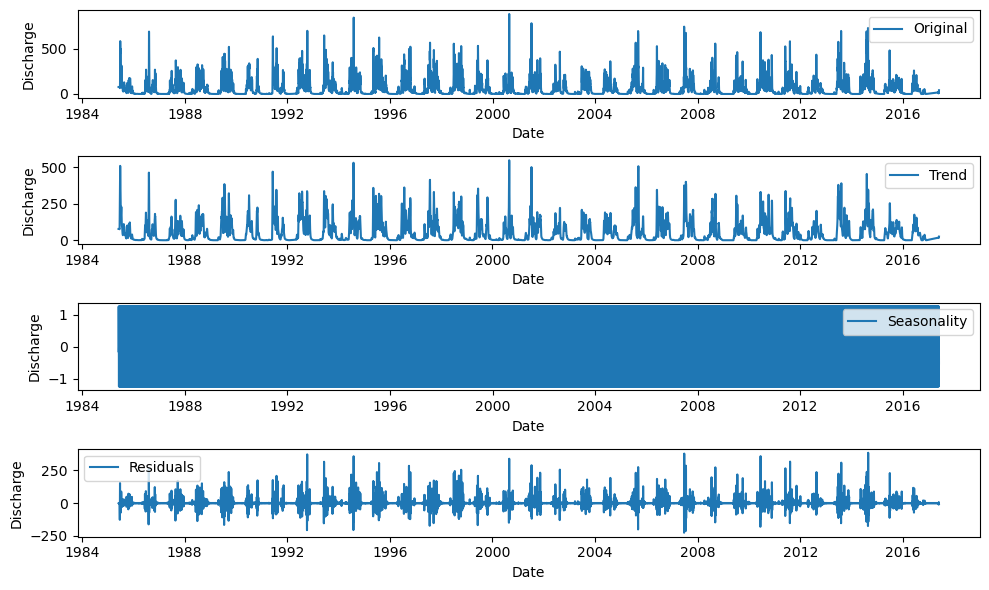

In [77]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Discharge (cumecs)'], model='additive')

trend = decomposition.trend
seasonality = decomposition.seasonal
residuals = decomposition.resid
plt.figure(figsize=(10,6))
plt.subplot(411)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(df['Discharge (cumecs)'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(seasonality,label='Seasonality')
plt.legend()
plt.subplot(414)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(residuals, label='Residuals')
plt.legend()
plt.tight_layout()

plt.show()

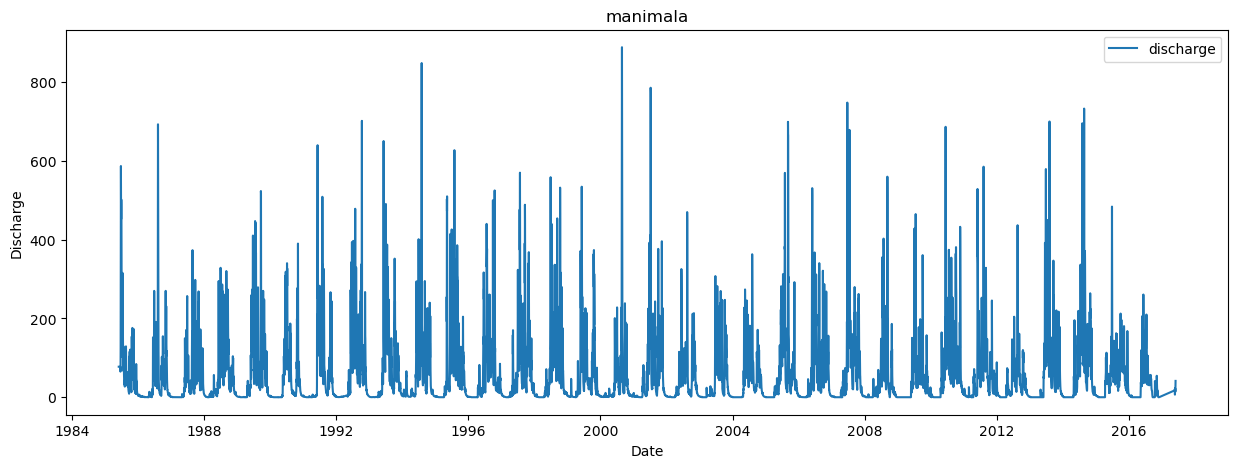

In [78]:
plt.figure(figsize=(15, 5))
plt.plot(df['Discharge (cumecs)'],label='discharge')
plt.title("manimala")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.show()

In [79]:
df.corr()

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
ALLSKY_SFC_SW_DWN,1.000000,0.411697,-0.426593,-0.486322,0.264343,-0.163809,-0.490711,-0.452822
TS,0.411697,1.000000,-0.022648,-0.161596,-0.188240,0.046331,-0.380951,-0.311212
QV2M,-0.426593,-0.022648,1.000000,0.329598,-0.497459,0.016365,0.431325,0.365919
PRECTOTCORR,-0.486322,-0.161596,0.329598,1.000000,-0.264626,0.106366,0.412038,0.442641
PS,0.264343,-0.188240,-0.497459,-0.264626,1.000000,-0.168814,-0.246726,-0.240283
WS10M_RANGE,-0.163809,0.046331,0.016365,0.106366,-0.168814,1.000000,0.196441,0.201079
Mean Gauge (m),-0.490711,-0.380951,0.431325,0.412038,-0.246726,0.196441,1.000000,0.904745
Discharge (cumecs),-0.452822,-0.311212,0.365919,0.442641,-0.240283,0.201079,0.904745,1.000000


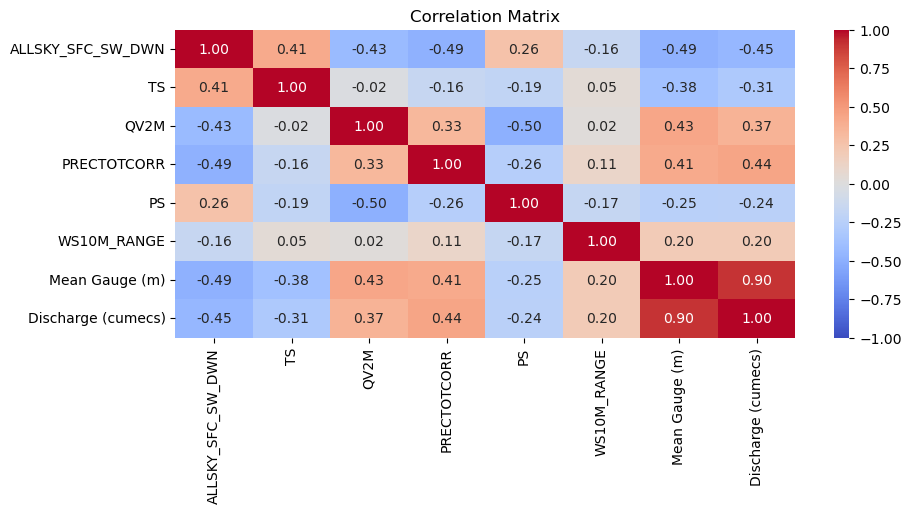

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [81]:
df

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
1985-06-01,3.16,23.75,17.21,9.81,96.10,3.02,3.435,77.4000
1985-06-02,2.95,23.53,17.52,29.36,96.13,1.21,3.280,77.4000
1985-06-03,3.58,23.47,17.15,46.45,96.10,1.38,3.880,77.4000
1985-06-04,4.20,23.81,17.15,9.45,96.16,1.35,4.025,77.4000
1985-06-05,2.34,23.36,17.09,5.75,96.28,1.01,4.110,77.4000
...,...,...,...,...,...,...,...,...
2017-05-27,5.57,25.73,18.07,5.76,96.05,1.54,2.280,21.9760
2017-05-28,3.32,25.29,18.43,12.94,96.08,2.12,2.240,18.0565
2017-05-29,1.90,25.44,18.92,17.14,96.05,1.97,2.200,14.1370


splitting the data set to train and test data
train data- before 2010-01-10
test data- after 2010-01-10


In [82]:
df.index = pd.to_datetime(df.index)
cutoff_date = pd.to_datetime('2010-01-10')
train = df[df.index < cutoff_date]
test = df[df.index >= cutoff_date]
train

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
1985-06-01,3.16,23.75,17.21,9.81,96.10,3.02,3.435,77.400
1985-06-02,2.95,23.53,17.52,29.36,96.13,1.21,3.280,77.400
1985-06-03,3.58,23.47,17.15,46.45,96.10,1.38,3.880,77.400
1985-06-04,4.20,23.81,17.15,9.45,96.16,1.35,4.025,77.400
1985-06-05,2.34,23.36,17.09,5.75,96.28,1.01,4.110,77.400
...,...,...,...,...,...,...,...,...
2010-01-05,5.42,22.04,14.34,0.00,96.27,1.31,0.980,4.174
2010-01-06,5.49,22.33,12.94,0.01,96.26,1.00,0.970,3.867
2010-01-07,5.58,22.66,14.28,0.00,96.33,1.05,0.940,2.999


In [83]:
test

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
2010-01-10,2.06,22.57,15.56,7.37,96.44,1.13,0.91,0.0000
2010-01-11,4.74,23.70,15.62,0.25,96.56,0.62,0.91,0.0000
2010-01-12,5.71,24.30,15.99,2.98,96.61,0.95,0.91,0.0000
2010-01-13,5.08,24.02,17.46,2.46,96.62,1.20,1.00,5.4050
2010-01-14,5.36,24.45,16.30,0.24,96.64,1.36,1.05,7.2630
...,...,...,...,...,...,...,...,...
2017-05-27,5.57,25.73,18.07,5.76,96.05,1.54,2.28,21.9760
2017-05-28,3.32,25.29,18.43,12.94,96.08,2.12,2.24,18.0565
2017-05-29,1.90,25.44,18.92,17.14,96.05,1.97,2.20,14.1370


In [84]:
x=test.index[0]
y=train.index[-1]
z=test.index
z

DatetimeIndex(['2010-01-10', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15', '2010-01-16', '2010-01-17',
               '2010-01-18', '2010-01-19',
               ...
               '2017-05-22', '2017-05-23', '2017-05-24', '2017-05-25',
               '2017-05-26', '2017-05-27', '2017-05-28', '2017-05-29',
               '2017-05-30', '2017-05-31'],
              dtype='datetime64[ns]', name='datetime', length=2699, freq='D')

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler=scaler.fit(df)

In [86]:
train =scaler.transform(train)
train

array([[0.40402685, 0.37209302, 0.79096868, ..., 0.60714286, 0.36768018,
        0.08711311],
       [0.37583893, 0.35445068, 0.81354698, ..., 0.203125  , 0.35022523,
        0.08711311],
       [0.46040268, 0.34963913, 0.78659869, ..., 0.24107143, 0.41779279,
        0.08711311],
       ...,
       [0.72885906, 0.28468324, 0.57756737, ..., 0.16741071, 0.08671171,
        0.00337535],
       [0.68187919, 0.3255814 , 0.64457393, ..., 0.21428571, 0.08558559,
        0.        ],
       [0.7114094 , 0.35284683, 0.73780044, ..., 0.12723214, 0.08333333,
        0.        ]])

In [87]:
test=scaler.transform(test)
test

array([[0.25637584, 0.27746592, 0.67079388, ..., 0.18526786, 0.08333333,
        0.        ],
       [0.61610738, 0.3680834 , 0.67516387, ..., 0.07142857, 0.08333333,
        0.        ],
       [0.74630872, 0.41619888, 0.70211216, ..., 0.14508929, 0.08333333,
        0.        ],
       ...,
       [0.23489933, 0.50761828, 0.91551347, ..., 0.37276786, 0.2286036 ,
        0.01591109],
       [0.51006711, 0.53247795, 0.96431173, ..., 0.31696429, 0.25675676,
        0.04225549],
       [0.71946309, 0.49879711, 0.87545521, ..., 0.31919643, 0.26238739,
        0.04661002]])

defining input shape to lstm
here input shape is (14,7) past 14 days values of 7 attributes
output shape is (1,3) 3 days future values 

In [88]:
import  numpy as np
trainx=[]
trainy=[]
n_future=3
n_past=14
for i in range(n_past,len(train)-n_future+1):
  # c = np.concatenate((train[i:i+1,0:3], train[i:i+1,4:8]), axis=1)
  trainx.append(train[i-n_past:i,0:8])
  trainy.append(train[i:i+n_future,7])
trainx,trainy=np.array(trainx),np.array(trainy)

In [89]:
trainx.shape

(8973, 14, 8)

In [90]:
trainy.shape

(8973, 3)

In [91]:
import tensorflow as tf
# import tf.keras as keras
from keras.models import Sequential
from keras.layers import LSTM,GRU,Bidirectional
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns


In [92]:
model1 = Sequential()
model1.add(GRU(units=256,activation='relu',return_sequences=True,input_shape=(n_past,8)))
model1.add(GRU(units=256,activation='relu',return_sequences=True))
model1.add(GRU(units=256,activation='relu',return_sequences=True))
model1.add(GRU(units=128,activation='relu',return_sequences=False))
# model1.add(Bidirectional(LSTM(units=128,activation='relu',return_sequences=True)))
# model1.add(Bidirectional(LSTM(units=128,activation='relu',return_sequences=True)))
# model1.add(Bidirectional(LSTM(units=64,activation='relu')))
model1.add(Dense(n_future,activation='relu'))
model1.compile(optimizer='adam',loss='mse')

In [93]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 14, 256)           204288    
                                                                 
 gru_5 (GRU)                 (None, 14, 256)           394752    
                                                                 
 gru_6 (GRU)                 (None, 14, 256)           394752    
                                                                 
 gru_7 (GRU)                 (None, 128)               148224    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1,142,403
Trainable params: 1,142,403
Non-trainable params: 0
_________________________________________________________________


In [94]:
model1.fit(trainx, trainy, epochs=200, batch_size=8000, validation_split=0.2, verbose=1)


Epoch 1/200
1/1 [==============================] - 7s 7s/step - loss: 0.0124 - val_loss: 0.0108
Epoch 2/200
1/1 [==============================] - 0s 313ms/step - loss: 0.0107 - val_loss: 0.0096
Epoch 3/200
1/1 [==============================] - 0s 325ms/step - loss: 0.0095 - val_loss: 0.0087
Epoch 4/200
1/1 [==============================] - 0s 311ms/step - loss: 0.0086 - val_loss: 0.0083
Epoch 5/200
1/1 [==============================] - 0s 305ms/step - loss: 0.0080 - val_loss: 0.0077
Epoch 6/200
1/1 [==============================] - 0s 299ms/step - loss: 0.0075 - val_loss: 0.0069
Epoch 7/200
1/1 [==============================] - 0s 298ms/step - loss: 0.0066 - val_loss: 0.0062
Epoch 8/200
1/1 [==============================] - 0s 311ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 9/200
1/1 [==============================] - 0s 312ms/step - loss: 0.0056 - val_loss: 0.0057
Epoch 10/200
1/1 [==============================] - 0s 303ms/step - loss: 0.0055 - val_loss: 0.0057
Epoch 11/200

In [95]:
asd=model1.predict(trainx)

281/281 [==============================] - 3s 11ms/step


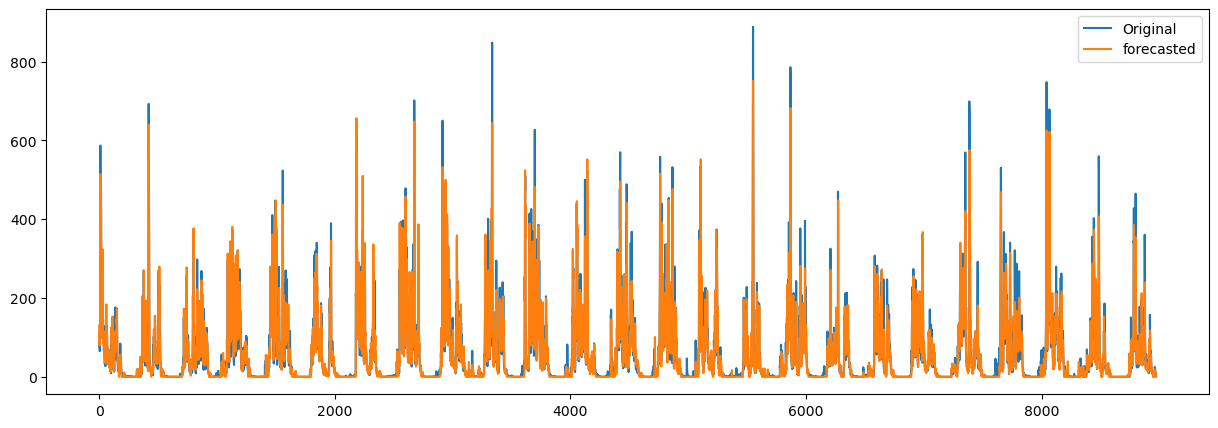

RMSE: 31.618210776410102
R-squared score: 0.87
MAD: 14.98913440178564
MAE score: 14.99


In [96]:
first_elements = [[row[0]] for row in asd]
#print(first_elements)
ppprr=np.array(first_elements)
#print(pppr.shape)
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

first_elements = [[row[7]] for row in train]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past:-2],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past:-2],disc))
print("RMSE:",rmse)

actual = disc_org[n_past:-2]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

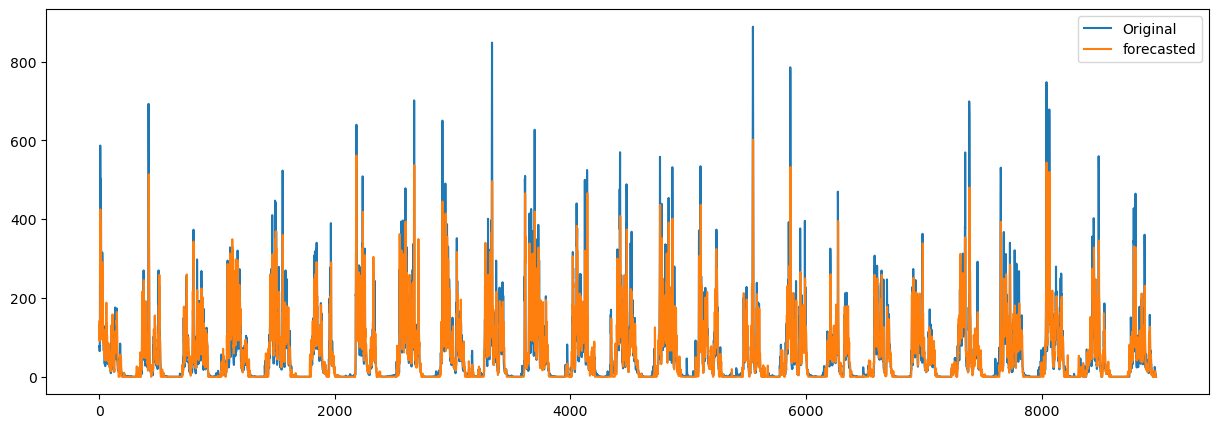

RMSE: 46.357199838713775
R-squared score: 0.72
MAD: 21.649846480601248
MAE score: 21.65


In [97]:
second_elements = [[row[1]] for row in asd]
#print(first_elements)
ppprr=np.array(second_elements )
#print(pppr.shape)
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

first_elements = [[row[7]] for row in train]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past+1:-1],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+1:-1],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+1:-1]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

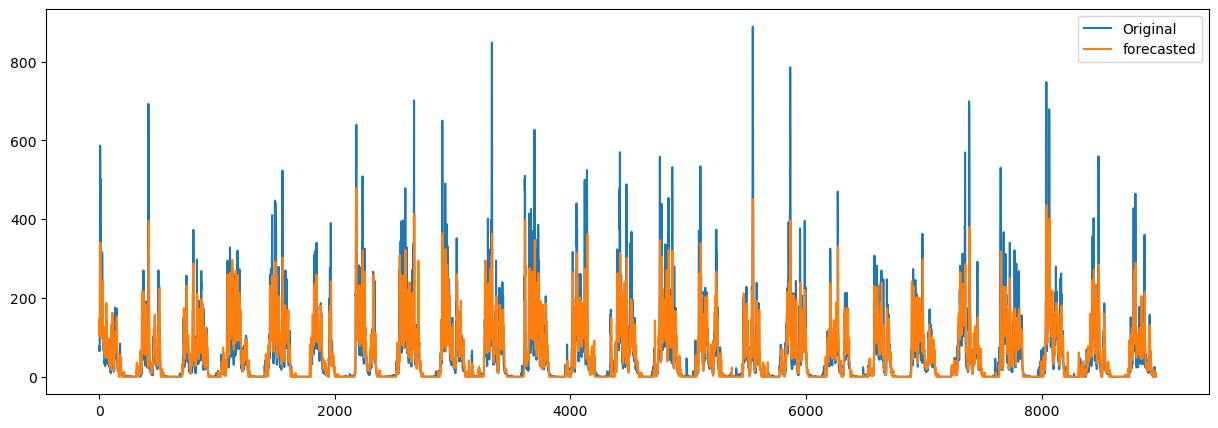

RMSE: 55.533095834996686
R-squared score: 0.60
MAD: 26.839941690844114
MAE score: 26.84


In [98]:
third_elements = [[row[2]] for row in asd]
#print(first_elements)
ppprr=np.array(third_elements )
#print(pppr.shape)
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

first_elements = [[row[7]] for row in train]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past+2:len(disc_org)],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+2:len(disc_org)],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+2:len(disc_org)]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

for testing 
input shape is (14,7) past 14 days values of 7 attributes 
output shape is (1,3) 3 days future values

In [99]:
testx=[]
testy=[]
n_future=3
n_past=14
for i in range(n_past,len(test)-n_future+1):
  # c = np.concatenate((test[i:i+1,0:3], test[i:i+1,4:8]), axis=1)
  testx.append(test[i-n_past:i,0:8])
  testy.append(test[i:i+n_future,7])
testx,testy=np.array(testx),np.array(testy)

In [100]:
testy

array([[0.00084187, 0.00070006, 0.00066179],
       [0.00070006, 0.00066179, 0.00069668],
       [0.00066179, 0.00069668, 0.00049634],
       ...,
       [0.02473382, 0.02032245, 0.01591109],
       [0.02032245, 0.01591109, 0.04225549],
       [0.01591109, 0.04225549, 0.04661002]])

In [101]:
testx.shape

(2683, 14, 8)

In [102]:
testx.shape

(2683, 14, 8)

In [103]:
fore=model1.predict(testx)

84/84 [==============================] - 1s 10ms/step


In [104]:
fore

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       ...,
       [0.03706185, 0.0514254 , 0.05818366],
       [0.02747255, 0.04063189, 0.04858003],
       [0.05502367, 0.07490503, 0.08201464]], dtype=float32)

fore contains repation of days([day1,day2,day3],[day2,day3,day4],[day3,day4,day5])
so we take first col only (day1,day2,day3...)

In [105]:
first_elements = [[row[0]] for row in fore]
#print(first_elements)
ppprr=np.array(first_elements)
#print(pppr.shape)

In [106]:
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

(2683,)

In [107]:
first_elements = [[row[7]] for row in test]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)

In [108]:
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape

(2699,)

In [109]:
min(disc)

0.0

In [110]:
max(disc)

570.39386

In [111]:
min(disc_org)

0.0

In [112]:
max(disc_org)

732.7

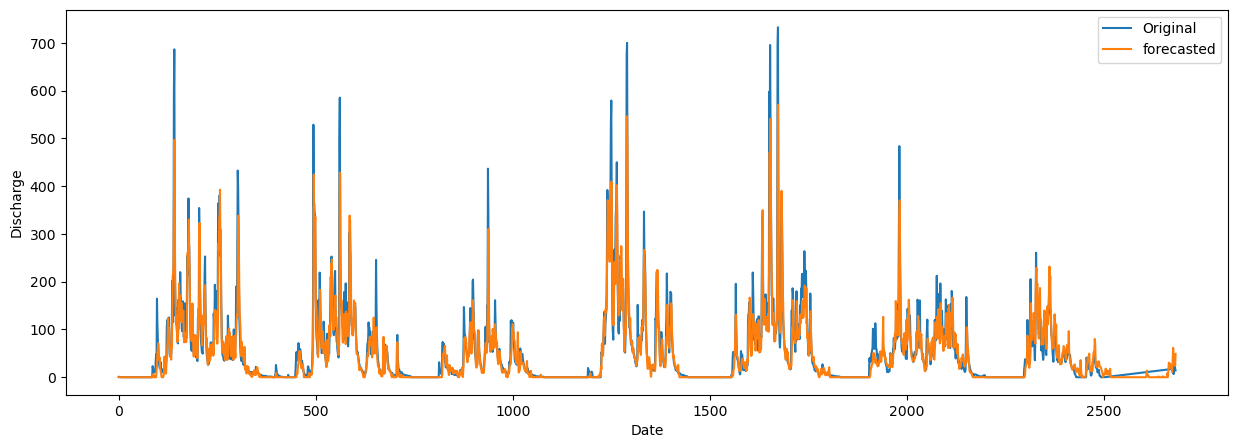

RMSE: 31.21816721611642
R-squared score: 0.85
MAD: 14.444510834356679
MAE score: 14.44


In [113]:
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past:-2],label='Original')
plt.plot(disc,label='forecasted')
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past:-2],disc))
print("RMSE:",rmse)

actual = disc_org[n_past:-2]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

In [114]:

forcast_period_dates=pd.date_range(x,periods=len(test),freq='1d').tolist()
forcast_dates=[]
for time in forcast_period_dates:
    forcast_dates.append(time.date())
print(forcast_dates[0])
print(len(forcast_dates))
forcast_dates[-1]

2010-01-10
2699


datetime.date(2017, 5, 31)

In [115]:

dt_forcast = np.column_stack((forcast_dates[n_past:-2], disc))
dt_forcast = pd.DataFrame(dt_forcast, columns=['Date', 'discharge'])
dt_forcast['Date'] = pd.to_datetime(dt_forcast['Date'])
dt_forcast['Date'] = dt_forcast['Date'].dt.tz_localize(None) # remove any timezone information
# dt_forcast['Date'] = dt_forcast['Date'].dt.tz_localize('UTC') # set timezone to UTC

dt_forcast = dt_forcast.set_index('Date')


orginal = disc_org[n_past:-2]
dt = np.column_stack((forcast_dates[n_past:-2], orginal))
dt = pd.DataFrame(dt, columns=['Date', 'discharge'])
dt['Date'] = pd.to_datetime(dt['Date'])
dt['Date'] = dt['Date'].dt.tz_localize(None) # remove any timezone information
# dt_forcast['Date'] = dt_forcast['Date'].dt.tz_localize('UTC') # set timezone to UTC


dt = dt.set_index('Date')
dt_forcast


,discharge
Date,
2010-01-24,0.0
2010-01-25,0.0
2010-01-26,0.0
2010-01-27,0.0
2010-01-28,0.0
...,...
2017-05-25,24.44902
2017-05-26,31.942142
2017-05-27,32.929455


In [116]:
dt

,discharge
Date,
2010-01-24,0.748
2010-01-25,0.622
2010-01-26,0.588
2010-01-27,0.619
2010-01-28,0.441
...,...
2017-05-25,18.081
2017-05-26,22.907
2017-05-27,21.976


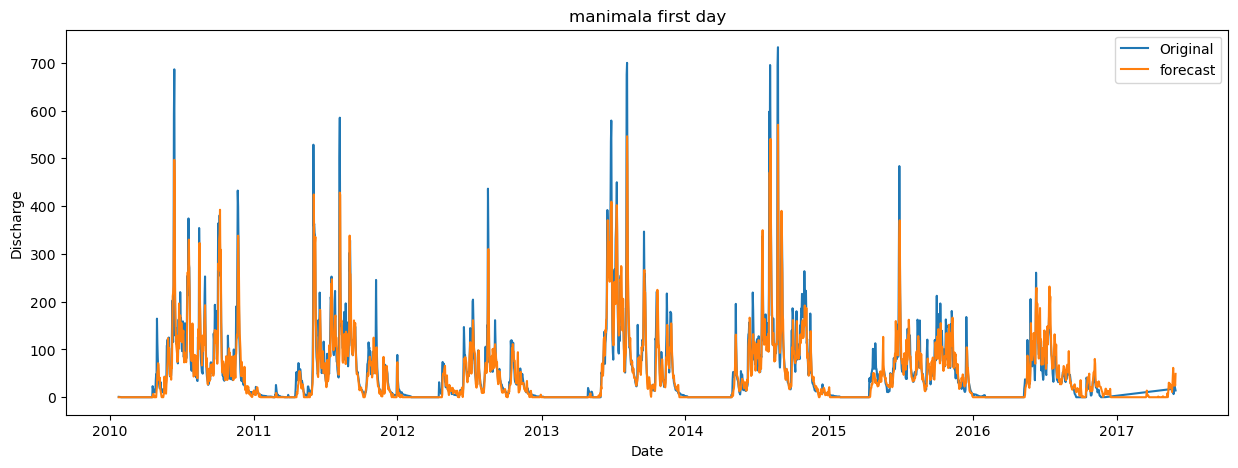

In [117]:
plt.figure(figsize=(15, 5))

plt.plot(dt.index, dt, label='Original')
plt.plot(dt_forcast.index, dt_forcast['discharge'], label='forecast')
plt.legend()
plt.title("manimala first day")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.show()

In [118]:
dt['discharge'][-10:-1]

Date
2017-05-20    17.249254
2017-05-21    17.350127
2017-05-22       17.451
2017-05-23       20.717
2017-05-24        6.571
2017-05-25       18.081
2017-05-26       22.907
2017-05-27       21.976
2017-05-28      18.0565
Name: discharge, dtype: object

In [119]:
disc_org[-10:-1]

array([17.451 , 20.717 ,  6.571 , 18.081 , 22.907 , 21.976 , 18.0565,
       14.137 , 37.544 ])

In [120]:
dt_forcast['discharge'][:10]

Date
2010-01-24    0.0
2010-01-25    0.0
2010-01-26    0.0
2010-01-27    0.0
2010-01-28    0.0
2010-01-29    0.0
2010-01-30    0.0
2010-01-31    0.0
2010-02-01    0.0
2010-02-02    0.0
Name: discharge, dtype: object

In [121]:
disc[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [122]:
dt_forcast['discharge'][-10:-1]

Date
2017-05-20     10.94804
2017-05-21    24.361929
2017-05-22    43.919182
2017-05-23    61.464905
2017-05-24    29.058897
2017-05-25     24.44902
2017-05-26    31.942142
2017-05-27    32.929455
2017-05-28    24.409359
Name: discharge, dtype: object

In [123]:
disc[-10:-1]

array([10.94804 , 24.361929, 43.91918 , 61.464905, 29.058897, 24.44902 ,
       31.942142, 32.929455, 24.409359], dtype=float32)

In [124]:
rmse = sqrt(mean_squared_error(dt_forcast['discharge'],dt['discharge']))
print("RMSE:",rmse)
from sklearn.metrics import mean_squared_error, r2_score
import math
actual = disc_org[n_past:-2]
forecast = disc
r2 = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2))


RMSE: 31.21816721611642
R-squared score: 0.85


fore contains repation of days([day1,day2,day3],[day2,day3,day4],[day3,day4,day5])
so we take second col only (day2,day3,day4...)

In [125]:
second_elements = [[row[1]] for row in fore]
# print(second_elements)
pppr=np.array(second_elements)
# print(pppr.shape)


In [126]:
import numpy as np
forcast_copies = np.repeat(pppr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

(2683,)

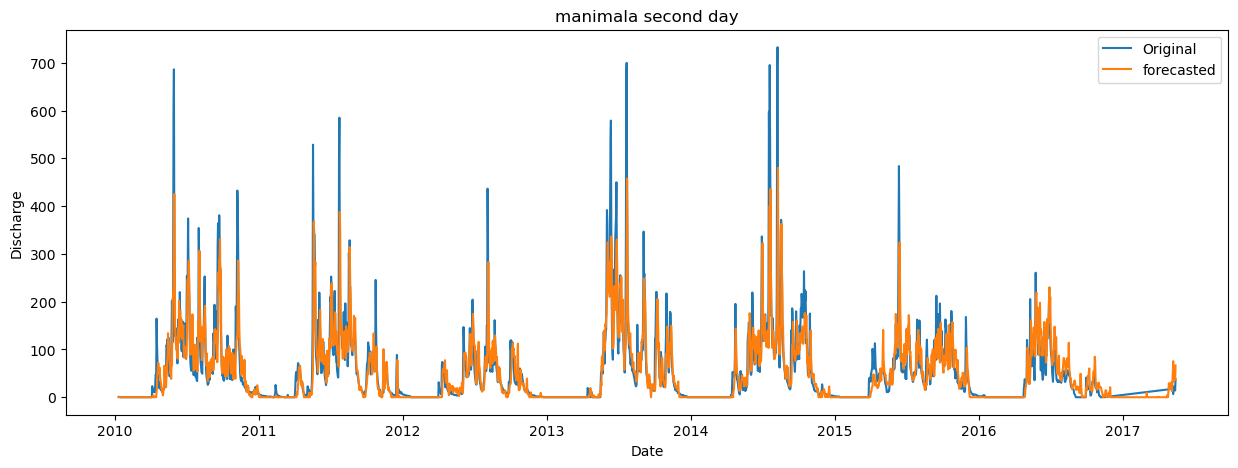

RMSE: 44.65754047882396
R-squared score: 0.69
MAD: 20.365967121068604
MAE score: 20.37


In [127]:
import datetime
dates = [datetime.datetime(2010, 1, 10) + datetime.timedelta(days=i) for i in range(len(disc_org[n_past+1:-1]))]

plt.figure(figsize=(15, 5))
plt.plot(dates,disc_org[n_past+1:-1],label='Original')
plt.plot(dates,disc,label='forecasted')
plt.title("manimala second day")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+1:-1],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+1:-1]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))


fore contains repation of days([day1,day2,day3],[day2,day3,day4],[day3,day4,day5])
so we take first col only (day3,day4,day5...)

In [128]:
third_elements = [[row[2]] for row in fore]
#print(third_elements)
pppr=np.array(third_elements)
# print(pppr.shape)


In [129]:
import numpy as np
forcast_copies = np.repeat(pppr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape


(2683,)

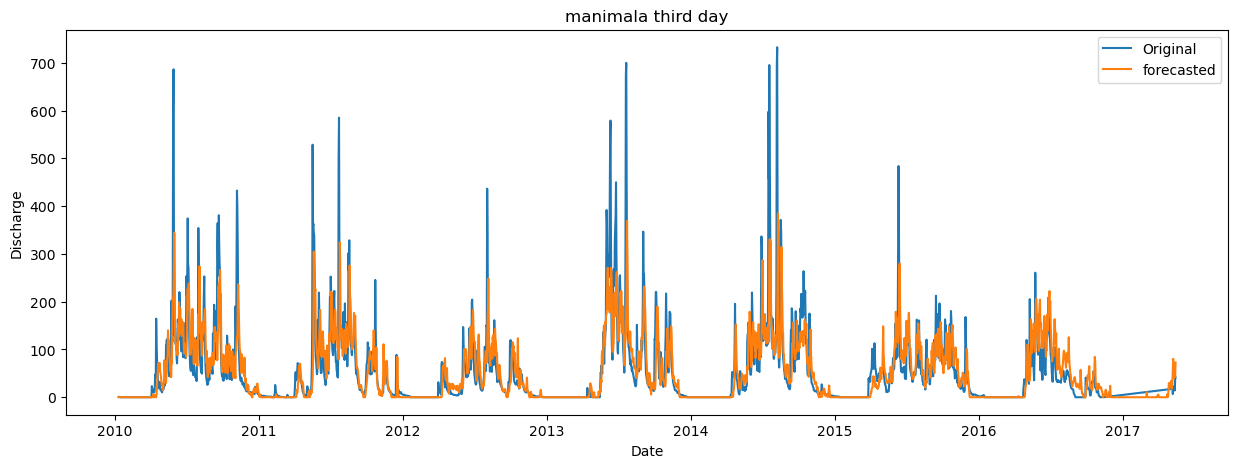

RMSE: 53.81164189538342
R-squared score: 0.55
MAD: 25.854575541913174
MAE score: 25.85


In [130]:
import datetime
dates = [datetime.datetime(2010, 1, 10) + datetime.timedelta(days=i) for i in range(len(disc_org[n_past+2:len(disc_org)]))]

plt.figure(figsize=(15, 5))
plt.plot(dates,disc_org[n_past+2:len(disc_org)],label='Original')
plt.plot(dates,disc,label='forecasted')
plt.title("manimala third day")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+2:len(disc_org)],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+2:len(disc_org)]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

In [131]:
# model1.save('final_manimala_gru.h5')

In [132]:
#!pip install kaggle
